In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree as arbre
from sklearn.model_selection import cross_validate

In [183]:
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)


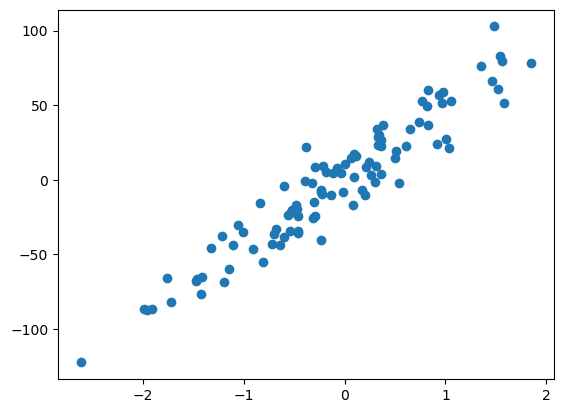

In [184]:
plt.scatter(X, y);

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [186]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 1), (20, 1), (80,), (20,))

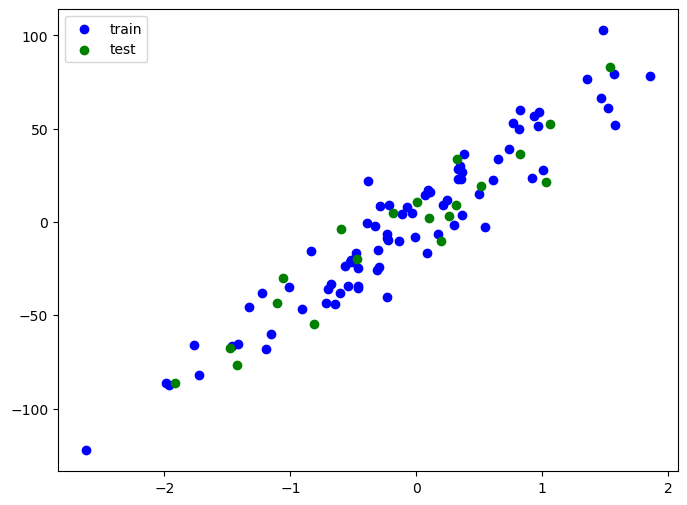

In [187]:
ax, fig = plt.subplots(figsize=(8, 6))
fig.scatter(X_train, y_train, c="b", label="train")
fig.scatter(X_test, y_test, c="g", label ="test")
fig.legend();

In [188]:
model = LinearRegression()

In [189]:
model.fit(X_train, y_train)

LinearRegression()

In [190]:
y_pred = model.predict(X_test)

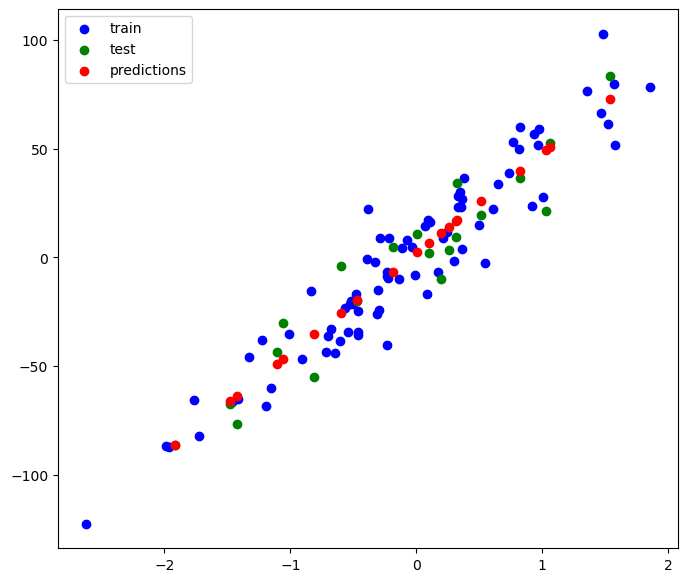

In [191]:
ax, fig = plt.subplots(figsize=(8, 7))
fig.scatter(X_train, y_train, c="b", label="train")
fig.scatter(X_test, y_test, c="g", label ="test")
fig.scatter(X_test, y_pred, c="r", label ="predictions")
fig.legend();

In [192]:
score = mean_squared_error(y_test, y_pred, squared=False)
score

13.061809723263158

In [193]:
from  sklearn.preprocessing import PolynomialFeatures

In [194]:
import numpy as np

In [195]:
X, y = make_regression(n_samples=500, n_features=1, random_state=42, noise=15)

In [196]:
y = y**2 + y

In [197]:
model = LinearRegression()

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [199]:
X_train_poly = PolynomialFeatures(2).fit_transform(X_train)
X_test_poly = PolynomialFeatures(2).fit_transform(X_test)

In [200]:
model.fit(X_train, y_train)

LinearRegression()

In [201]:
y_pred = model.predict(X_test)

In [202]:
score = mean_squared_error(y_pred=y_pred, y_true=y_test, squared=False)
score

5059.685812909959

In [203]:
model.fit(X_train_poly, y_train)

LinearRegression()

In [204]:
y_pred_poly = model.predict(X_test_poly)

In [205]:
score_poly = mean_squared_error(y_pred=y_pred_poly, y_true=y_test, squared=False)
score_poly

2152.9957734065156

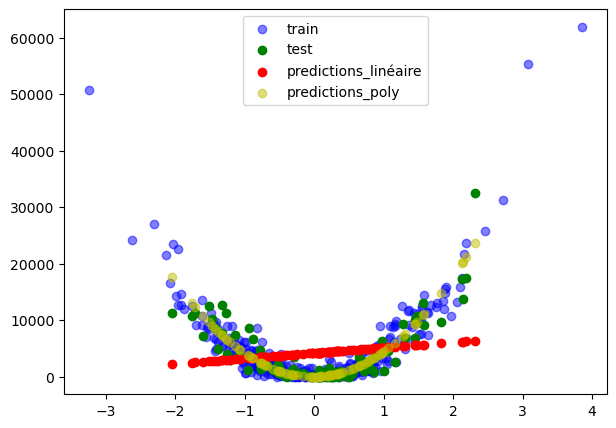

In [206]:
ax, fig = plt.subplots(figsize=(7, 5))
fig.scatter(X_train, y_train, c="b", alpha=0.5, label="train")
fig.scatter(X_test, y_test, c="g", label ="test")
fig.scatter(X_test, y_pred, c="r", label ="predictions_linéaire")
fig.scatter(X_test, y_pred_poly, c="y", alpha=0.5, label="predictions_poly")
fig.legend();

In [207]:
X2, y2 = make_regression(n_features=1, n_samples=500, random_state=42, noise=20)
y2 = y2**3

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.8)

In [209]:
X_train_poly = PolynomialFeatures(3).fit_transform(X_train)
X_test_poly = PolynomialFeatures(3).fit_transform(X_test)

In [210]:
model.fit(X_train, y_train)

LinearRegression()

In [211]:
y_pred = model.predict(X_test)

In [212]:
score = mean_squared_error(y_pred=y_pred, y_true=y_test, squared=False)
score

1393483.0629169738

In [213]:
model.fit(X_train_poly, y_train)

LinearRegression()

In [214]:
y_pred_poly = model.predict(X_test_poly)

In [215]:
score_poly = mean_squared_error(y_pred=y_pred_poly, y_true=y_test, squared=False)
score_poly

863653.6450430752

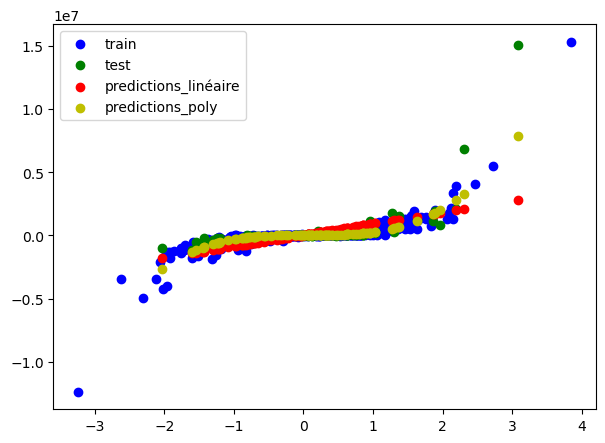

In [216]:
ax, fig = plt.subplots(figsize=(7, 5))
fig.scatter(X_train, y_train, c="b", label="train")
fig.scatter(X_test, y_test, c="g", label ="test")
fig.scatter(X_test, y_pred, c="r", label ="predictions_linéaire")
fig.scatter(X_test, y_pred_poly, c="y", label="predictions_poly")
fig.legend();

In [217]:
data_covid = pd.read_csv("reduced_covid_sexe.csv")
data_covid["jour"] = data_covid["Unnamed: 0"][2:] 
data_covid.drop(1, inplace=True)
data_covid.rename(index={0:"sexe"}, inplace=True)
data_covid.drop(data_covid.columns[0], axis=1, inplace=True)
data_covid.drop("sexe" ,inplace=True)
data_covid.index -= 2
data_covid

,hosp,hosp.1,hosp.2,rea,rea.1,rea.2,rad,rad.1,rad.2,dc,dc.1,dc.2,jour
0,2972.0,1685.0,1248.0,771.0,525.0,239.0,816.0,432.0,379.0,218.0,121.0,96.0,2020-03-18
1,4073.0,2256.0,1632.0,1002.0,689.0,284.0,1180.0,580.0,562.0,327.0,179.0,136.0,2020-03-19
2,5226.0,2912.0,2134.0,1297.0,905.0,362.0,1587.0,777.0,764.0,450.0,250.0,190.0,2020-03-20
3,5900.0,3298.0,2401.0,1453.0,1018.0,401.0,1811.0,881.0,888.0,525.0,297.0,219.0,2020-03-21
4,6954.0,3906.0,2815.0,1674.0,1176.0,461.0,2117.0,1031.0,1040.0,632.0,356.0,263.0,2020-03-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,13113.0,5950.0,6923.0,728.0,457.0,263.0,861972.0,421189.0,432745.0,135936.0,77555.0,57324.0,2023-03-27
1105,13178.0,6000.0,6943.0,720.0,452.0,261.0,862458.0,421407.0,433007.0,135975.0,77575.0,57342.0,2023-03-28
1106,13184.0,5989.0,6964.0,734.0,456.0,270.0,862962.0,421645.0,433268.0,136009.0,77594.0,57356.0,2023-03-29
1107,13186.0,5953.0,7003.0,732.0,459.0,267.0,863331.0,421833.0,433447.0,136045.0,77609.0,57376.0,2023-03-30


In [218]:
data_covid.to_csv("covid_cleaned.csv")

In [219]:
data_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109 entries, 0 to 1108
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hosp    1109 non-null   float64
 1   hosp.1  1109 non-null   float64
 2   hosp.2  1109 non-null   float64
 3   rea     1109 non-null   float64
 4   rea.1   1109 non-null   float64
 5   rea.2   1109 non-null   float64
 6   rad     1109 non-null   float64
 7   rad.1   1109 non-null   float64
 8   rad.2   1109 non-null   float64
 9   dc      1109 non-null   float64
 10  dc.1    1109 non-null   float64
 11  dc.2    1109 non-null   float64
 12  jour    1109 non-null   object 
dtypes: float64(12), object(1)
memory usage: 121.3+ KB


In [220]:
data_covid_mois = data_covid.groupby(data_covid["jour"].astype('datetime64[D]').dt.to_period('M')).sum()
data_covid_mois

C:\Users\User\AppData\Local\Temp\ipykernel_4024\2540967867.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_covid_mois = data_covid.groupby(data_covid["jour"].astype('datetime64[D]').dt.to_period('M')).sum()


,hosp,hosp.1,hosp.2,rea,rea.1,rea.2,rad,rad.1,rad.2,dc,dc.1,dc.2
jour,,,,,,,,,,,,
2020-03,166122.0,97072.0,66486.0,40204.0,29177.0,10592.0,59210.0,29315.0,29045.0,20658.0,12252.0,8237.0
2020-04,880325.0,479086.0,392894.0,175719.0,128550.0,45552.0,937576.0,499394.0,429982.0,311543.0,186031.0,123233.0
2020-05,617191.0,312409.0,302345.0,70831.0,52731.0,17937.0,1862096.0,977872.0,876117.0,533570.0,315104.0,216697.0
2020-06,324102.0,164201.0,157799.0,24847.0,18134.0,6595.0,2189600.0,1134378.0,1045653.0,570378.0,335358.0,233001.0
2020-07,207436.0,105268.0,100662.0,13918.0,10031.0,3715.0,2453873.0,1265774.0,1176891.0,606208.0,355668.0,248368.0
2020-08,149450.0,77672.0,70572.0,11391.0,7888.0,3370.0,2606767.0,1340278.0,1254233.0,617017.0,361830.0,252929.0
2020-09,163937.0,88398.0,73954.0,23300.0,16116.0,6996.0,2730004.0,1403413.0,1313008.0,617084.0,361610.0,253072.0
2020-10,370119.0,198142.0,167788.0,62325.0,44370.0,17393.0,3266738.0,1684025.0,1564726.0,702381.0,411598.0,287847.0
2020-11,906226.0,468370.0,428369.0,131089.0,94666.0,35389.0,4229537.0,2189001.0,2019071.0,930203.0,545756.0,380347.0


In [221]:
model = LinearRegression()

In [222]:
X = np.expand_dims(data_covid.index, axis=1)
y = data_covid["dc"]

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8)

In [224]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((887, 1), (222, 1), (887,), (222,))

In [225]:
model.fit(X_train, y_train)

LinearRegression()

In [226]:
y_pred = model.predict(X_test)

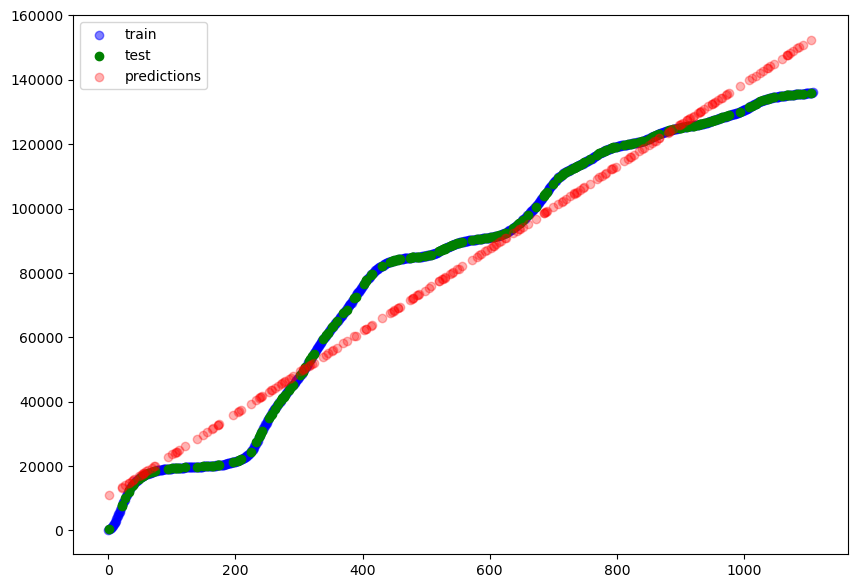

In [227]:
ax, fig = plt.subplots(figsize=(10, 7))
fig.scatter(X_train, y_train, c="b", alpha=0.5, label="train")
fig.scatter(X_test, y_test, c="g", label="test")
fig.scatter(X_test, y_pred, c="r", alpha=0.3, label="predictions")
fig.legend();

In [228]:
score = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
score

8174.97776360171

In [229]:
split = int(0.2 * len(X))

In [230]:
def sample_data(X_start, X_stop, y=data_covid["dc"]):
    X_n = np.expand_dims(np.arange(X_start, X_stop), axis=1)
    y_n = y[X_start:X_stop]
    X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.2, shuffle=True) 
    X_train = PolynomialFeatures(2).fit_transform(X_train_n)
    X_test = PolynomialFeatures(2).fit_transform(X_test_n)
    model.fit(X_train, y_train_n)
    y_pred_n = model.predict(X_test)
    return mean_squared_error(y_true=y_test_n, y_pred=y_pred_n), y_pred_n, X_test_n, y_test_n, X_train_n, y_train_n, model

In [231]:
score_1, y_pred_1, X_test_1, y_test_1, X_train_1, y_train_1, model_1 = sample_data(0, split)
score_2, y_pred_2, X_test_2, y_test_2, X_train_2, y_train_2, model_2 = sample_data(split,2* split)
score_3, y_pred_3, X_test_3, y_test_3, X_train_3, y_train_3, model_3 = sample_data(2*split, 3*split)
score_4, y_pred_4, X_test_4, y_test_4, X_train_4, y_train_4, model_4 = sample_data(3*split, len(X))

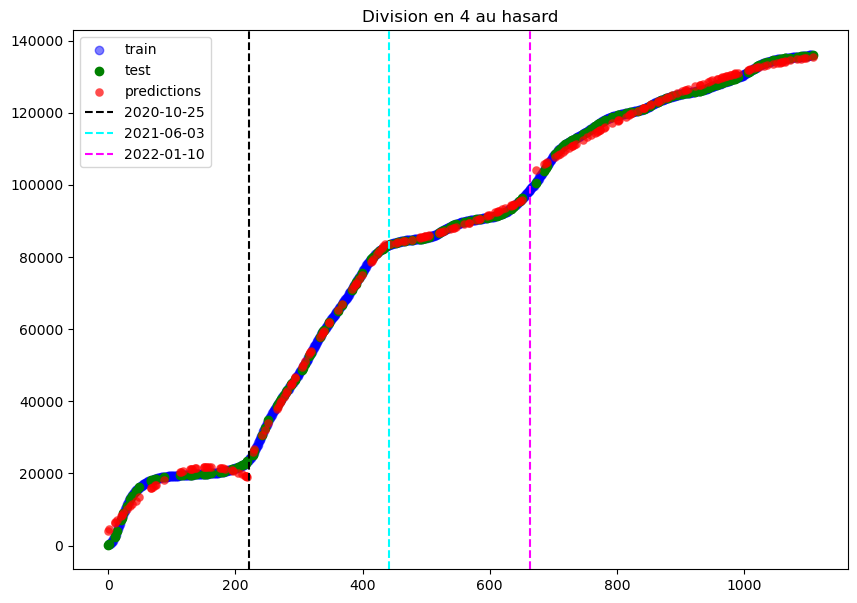

In [232]:
ax, fig = plt.subplots(figsize=(10, 7))
fig.scatter(X_train_1, y_train_1, c="b", alpha=0.5, label="train")
fig.scatter(X_train_2, y_train_2, c="b", alpha=0.5)
fig.scatter(X_train_3, y_train_3, c="b", alpha=0.5)
fig.scatter(X_train_4, y_train_4, c="b", alpha=0.5)
fig.scatter(X_test_1, y_test_1, c="g", label="test")
fig.scatter(X_test_2, y_test_2, c="g")
fig.scatter(X_test_3, y_test_3, c="g")
fig.scatter(X_test_4, y_test_4, c="g")
fig.scatter(X_test_1, y_pred_1, c="r", alpha=0.7, linewidths=0.1, label="predictions")
fig.scatter(X_test_2, y_pred_2, c="r", alpha=0.7,  linewidths=0.1)
fig.scatter(X_test_3, y_pred_3, c="r", alpha=0.7,  linewidths=0.1)
fig.scatter(X_test_4, y_pred_4, c="r", alpha=0.7,  linewidths=0.1)
fig.axvline(split, linestyle = "--", c="black", label = data_covid["jour"][split])
fig.axvline(2*split, linestyle = "--", c="cyan", label = data_covid["jour"][2*split] )
fig.axvline(3*split, linestyle = "--", c="magenta", label = data_covid["jour"][3*split])
fig.set_title("Division en 4 au hasard")
fig.legend();

In [233]:
score = {}
score["score_1"] = score_1
score["score_2"] = score_2
score["score_3"] = score_3
score["score_4"] = score_4
score

{'score_1': 4965390.04081326,
 'score_2': 260596.0986151015,
 'score_3': 356926.57578384207,
 'score_4': 1688221.2444983283}

In [234]:
Tree = DecisionTreeRegressor(max_leaf_nodes=4)

In [235]:
Tree.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=4)

[Text(0.5, 0.8333333333333334, 'x[0] <= 376.5\nsquared_error = 1758827153.411\nsamples = 1109\nvalue = 81837.816'),
 Text(0.25, 0.5, 'x[0] <= 255.5\nsquared_error = 310665153.209\nsamples = 377\nvalue = 29744.472'),
 Text(0.125, 0.16666666666666666, 'squared_error = 45527353.726\nsamples = 256\nvalue = 18893.906'),
 Text(0.375, 0.16666666666666666, 'squared_error = 95522018.089\nsamples = 121\nvalue = 52701.041'),
 Text(0.75, 0.5, 'x[0] <= 693.5\nsquared_error = 387210194.141\nsamples = 732\nvalue = 108667.311'),
 Text(0.625, 0.16666666666666666, 'squared_error = 57144165.653\nsamples = 317\nvalue = 87973.719'),
 Text(0.875, 0.16666666666666666, 'squared_error = 62372628.675\nsamples = 415\nvalue = 124474.224')]

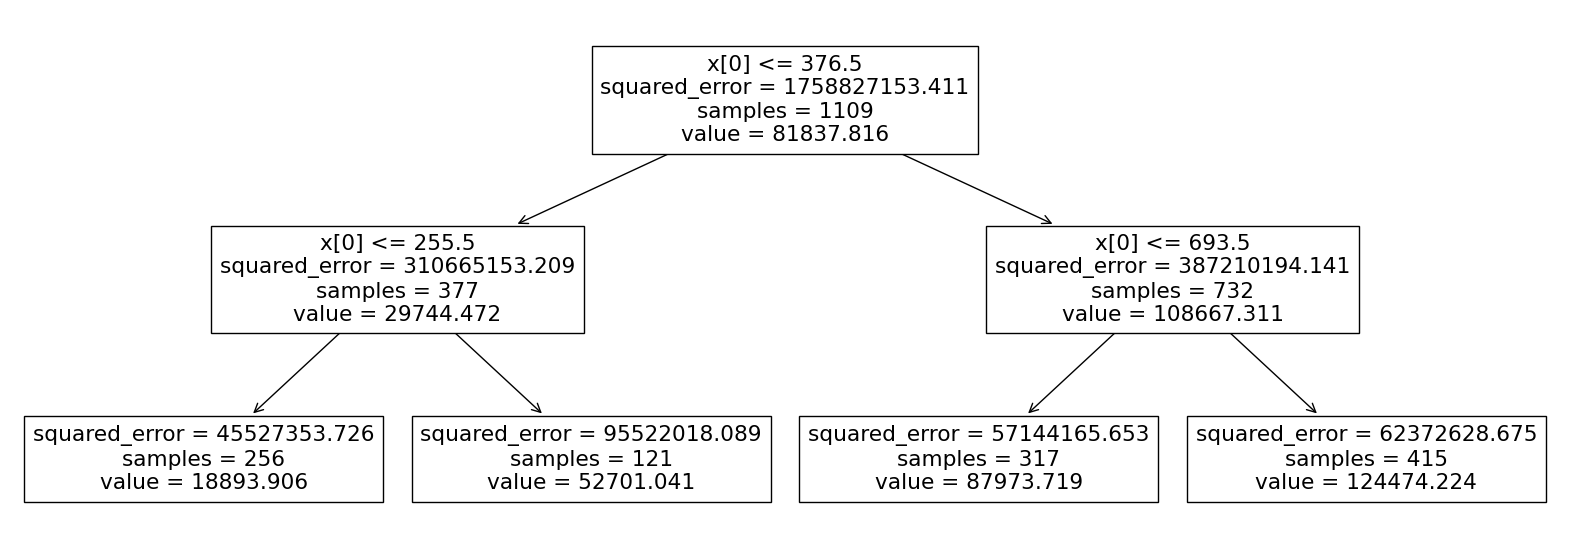

In [236]:
ax, fig = plt.subplots(figsize=(20, 7))
arbre.plot_tree(Tree)

In [237]:
thresold_values = Tree.tree_.threshold
thresold_values

array([376.5, 255.5, 693.5,  -2. ,  -2. ,  -2. ,  -2. ])

In [238]:
score_1, y_pred_1, X_test_1, y_test_1, X_train_1, y_train_1, model_1_ = sample_data(0, 256)
score_2, y_pred_2, X_test_2, y_test_2, X_train_2, y_train_2, model_2_ = sample_data(256,377)
score_3, y_pred_3, X_test_3, y_test_3, X_train_3, y_train_3, model_3_ = sample_data(377, 694)
score_4, y_pred_4, X_test_4, y_test_4, X_train_4, y_train_4, model_4_ = sample_data(694, 1109)

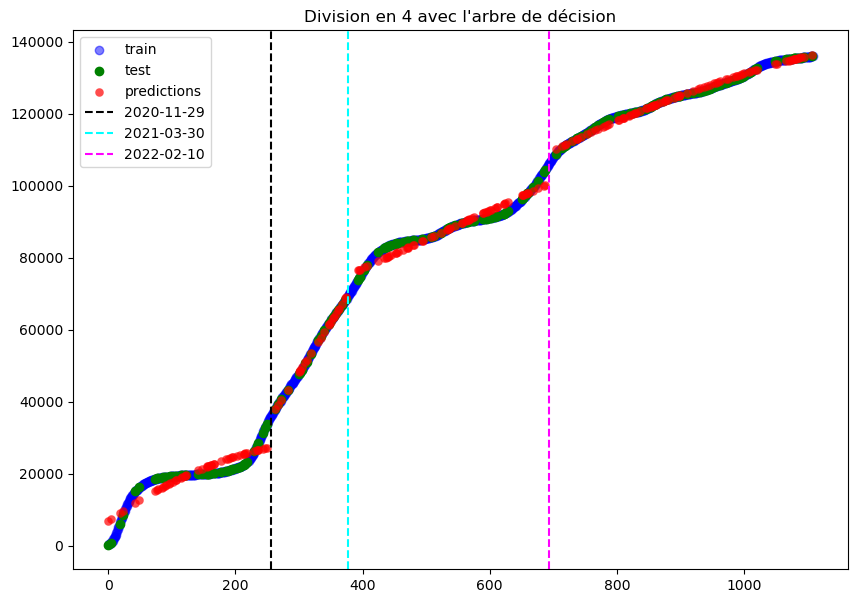

In [239]:
ax, fig = plt.subplots(figsize=(10, 7))
fig.scatter(X_train_1, y_train_1, c="b", alpha=0.5, label="train")
fig.scatter(X_train_2, y_train_2, c="b", alpha=0.5)
fig.scatter(X_train_3, y_train_3, c="b", alpha=0.5)
fig.scatter(X_train_4, y_train_4, c="b", alpha=0.5)
fig.scatter(X_test_1, y_test_1, c="g", label="test")
fig.scatter(X_test_2, y_test_2, c="g")
fig.scatter(X_test_3, y_test_3, c="g")
fig.scatter(X_test_4, y_test_4, c="g")
fig.scatter(X_test_1, y_pred_1, c="r", alpha=0.7, linewidths=0.1, label="predictions")
fig.scatter(X_test_2, y_pred_2, c="r", alpha=0.7,  linewidths=0.1)
fig.scatter(X_test_3, y_pred_3, c="r", alpha=0.7,  linewidths=0.1)
fig.scatter(X_test_4, y_pred_4, c="r", alpha=0.7,  linewidths=0.1)
fig.axvline(256, linestyle = "--", c="black", label = data_covid["jour"][256])
fig.axvline(377, linestyle = "--", c="cyan", label = data_covid["jour"][377] )
fig.axvline(694, linestyle = "--", c="magenta", label = data_covid["jour"][694])
fig.set_title("Division en 4 avec l'arbre de décision")
fig.legend();

In [240]:
score = {}
score["score_1"] = score_1
score["score_2"] = score_2
score["score_3"] = score_3
score["score_4"] = score_4
score

{'score_1': 9004342.819665527,
 'score_2': 133060.22274522413,
 'score_3': 3646443.418892944,
 'score_4': 451071.96230934147}

In [241]:
X = np.expand_dims(np.arange(len(X)), axis=1)
y = data_covid["dc"]
cv_results_1 = cross_validate(model_1, X, y, cv=5)
cv_results_1_ = cross_validate(model_1_, X, y, cv=5)
cv_results_1

{'fit_time': array([0.00199747, 0.00099635, 0.        , 0.0009973 , 0.00101447]),
 'score_time': array([0.        , 0.        , 0.00099659, 0.00150347, 0.        ]),
 'test_score': array([-10.57981158,   0.65437936,  -5.70696384,  -0.32291694,
        -27.23635672])}

In [242]:
cv_results_1_

{'fit_time': array([0.0009973 , 0.00099635, 0.00099707, 0.        , 0.00102353]),
 'score_time': array([0.       , 0.       , 0.       , 0.0009973, 0.       ]),
 'test_score': array([-10.57981158,   0.65437936,  -5.70696384,  -0.32291694,
        -27.23635672])}

In [243]:
import this

In [244]:
this.s

"Gur Mra bs Clguba, ol Gvz Crgref\n\nOrnhgvshy vf orggre guna htyl.\nRkcyvpvg vf orggre guna vzcyvpvg.\nFvzcyr vf orggre guna pbzcyrk.\nPbzcyrk vf orggre guna pbzcyvpngrq.\nSyng vf orggre guna arfgrq.\nFcnefr vf orggre guna qrafr.\nErnqnovyvgl pbhagf.\nFcrpvny pnfrf nera'g fcrpvny rabhtu gb oernx gur ehyrf.\nNygubhtu cenpgvpnyvgl orngf chevgl.\nReebef fubhyq arire cnff fvyragyl.\nHayrff rkcyvpvgyl fvyraprq.\nVa gur snpr bs nzovthvgl, ershfr gur grzcgngvba gb thrff.\nGurer fubhyq or bar-- naq cersrenoyl bayl bar --boivbhf jnl gb qb vg.\nNygubhtu gung jnl znl abg or boivbhf ng svefg hayrff lbh'er Qhgpu.\nAbj vf orggre guna arire.\nNygubhtu arire vf bsgra orggre guna *evtug* abj.\nVs gur vzcyrzragngvba vf uneq gb rkcynva, vg'f n onq vqrn.\nVs gur vzcyrzragngvba vf rnfl gb rkcynva, vg znl or n tbbq vqrn.\nAnzrfcnprf ner bar ubaxvat terng vqrn -- yrg'f qb zber bs gubfr!"